**Welcome to the world of corporate policy analytics**<br>
In this notebook we will explore the viability of various policies adopted by International firms in the past based on the performance of the equities of those firms before and after adoption of those policies.<br>
<br>
Here we are interested in following historically profound changes adopted and subsequent consequences in the equity market:<br>
<ul>
<li>Sundar Pichai was appointed as CEO of Google Inc. in 2015</li>
<li>World renowned computer chip manufacturer Nvidea bought ARM in 2016</li>
<li>Steve Jobs returned as CEO of Apple Inc. in 1997 after being terminated by board members in 1985. He retired in 2011 after making Apple acheive newer heights.</li>
<li>Microsoft Inc. acquired linkedin in 2016</li>
<li>Demonetization in India had a severe impact on indian market. It was announced in 8<sup>th</sup> 2016.</li>
</ul> 
<br>
These events(policies) had everlasting impact on the international capital market and thus need indepth analysis so that we can come up with similar policies which had positive imapact and eliminate policies that had negative or neutral impact. 
<br>
In this I am going to perform Exploratory Data Analysis on the collected data to visualize the inherent pattern in it and then will move on to the forecast modelling part in which I will use tensorflow framework.
<br>
Following are models that I will use in the modelling phase :
<br>
<ul>
<li>Convolutional Neural Network</li>
<li>Long Short Term Memory Network</li>
<li>Support Vector Machine Regressor</li>
<li>Polynomial Regressor</li>
<li>Multi Layer Perceptron</li>
</ul>
<br> 
<b>Let's get started!</b>

In [1]:
# Necessary imports 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling1D
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [2]:
cd drive/My Drive/Colab Notebooks/Suraj_Project

/content/drive/My Drive/Colab Notebooks/Suraj_Project


In [3]:
ls -al

total 178649
-rw------- 1 root root 31361615 Nov  2 04:51 1.zip
-rw------- 1 root root    25287 Nov  2 04:51 2.zip
-rw------- 1 root root 18820207 Nov  2 04:51 3.zip
-rw------- 1 root root   446202 Nov  1 04:42 AAPL.csv
-rw------- 1 root root   378938 Oct  1 05:52 ADANIPORTS.csv
-rw------- 1 root root   603886 Oct  1 05:52 ASIANPAINT.csv
-rw------- 1 root root   593844 Oct  1 05:52 AXISBANK.csv
-rw------- 1 root root   378701 Oct  1 05:52 BAJAJ-AUTO.csv
-rw------- 1 root root   364807 Oct  1 05:52 BAJAJFINSV.csv
-rw------- 1 root root   577419 Oct  1 05:52 BAJFINANCE.csv
-rw------- 1 root root   548552 Oct  1 05:52 BHARTIARTL.csv
-rw------- 1 root root   570873 Oct  1 05:52 BPCL.csv
-rw------- 1 root root   594200 Oct  1 05:52 BRITANNIA.csv
-rw------- 1 root root   579233 Oct  1 05:52 CIPLA.csv
-rw------- 1 root root   296439 Oct  1 05:52 COALINDIA.csv
drwx------ 2 root root     4096 Nov  2 04:55 demonetization_data/
-rw------- 1 root root   606034 Oct  1 05:52 DRREDDY.csv
-rw------- 1

In [4]:
#!unzip 1.zip                # unzip trainning data

In [5]:
#ls -al

In [6]:
#!unzip 2.zip                # unzip trainning data

In [7]:
#!unzip 3.zip                # unzip trainning data

In [8]:
#ls -al

<b>Sundar Pichai</b> was appointed as CEO of Google Inc. in 2015. I am interested in evaluating the equity market performance between 2004 to 2015 for pre-appointment analysis and 2015 to 2020 for post-appointment analysis.   

In [9]:
dataset=pd.read_csv('GOOG.csv')

In [10]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-10-25,87.870636,96.851974,85.952827,93.350098,93.350098,65773900
1,2004-10-26,92.822083,95.960320,89.663918,90.560555,90.560555,44781400
2,2004-10-27,91.018837,94.406143,90.545616,92.637772,92.637772,26813100
3,2004-10-28,92.991447,96.832047,92.453461,96.289085,96.289085,29804800
4,2004-10-29,99.073647,99.601669,94.944122,94.964050,94.964050,42483600


In [11]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4024,2020-10-19,1580.459961,1588.150024,1528.000000,1534.609985,1534.609985,1607100
4025,2020-10-20,1527.050049,1577.500000,1525.670044,1555.930054,1555.930054,2241700
4026,2020-10-21,1573.329956,1618.729980,1571.630005,1593.310059,1593.310059,2568300
4027,2020-10-22,1593.050049,1621.989990,1585.000000,1615.329956,1615.329956,1433600
4028,2020-10-23,1626.069946,1642.359985,1620.510010,1641.000000,1641.000000,1375200


In [12]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4.029000e+03
mean,542.167985,547.350708,536.862749,542.263071,542.263071,6.745057e+06
std,387.764797,391.648459,384.289536,388.209914,388.209914,7.861034e+06
min,81.927917,84.433525,80.353813,82.241737,82.241737,7.900000e+03
25%,242.685349,245.295578,239.875885,242.391464,242.391464,1.693500e+06
50%,351.148804,354.795135,347.203583,349.953278,349.953278,4.074500e+06
75%,779.659973,782.739990,773.580017,778.190002,778.190002,8.560500e+06
max,1709.713989,1733.180054,1666.329956,1728.280029,1728.280029,8.254150e+07


Total size of the dataset is 4029 and counts of non NAN columns as in the table above asserts that there is no NAN values present in the dataset. This saved me from additional data preprocessing process.

In [13]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999887,0.999848,0.999739,0.999739,-0.539613
High,0.999887,1.000000,0.999806,0.999861,0.999861,-0.537798
Low,0.999848,0.999806,1.000000,0.999881,0.999881,-0.541792
Close,0.999739,0.999861,0.999881,1.000000,1.000000,-0.539836
Adj Close,0.999739,0.999861,0.999881,1.000000,1.000000,-0.539836
Volume,-0.539613,-0.537798,-0.541792,-0.539836,-0.539836,1.000000


The correlation matrix shows that the prices of stocks at varied interval of time of the day negatively impacts the volume of equities traded in the market which is in accordance with the general intuition that "costlier the comodity fewer will be it's sale". 
<br> <b>Note :</b> The most equities traded is when the equity price is lowest for the day.

In [14]:
# assigning dedicated arrays to the specific columns (helpful in preprocessing and visualization).
dates=dataset["Date"].values
open=dataset["Open"].values
low=dataset["Low"].values
close=dataset["Close"].values
high=dataset["High"].values

In [15]:
dates.shape

(4029,)

In [16]:
year=[]
month=[]
day=[]
for i in dates:
  temp=i.split('-')
  year.append(int(temp[0]))
  month.append(int(temp[1]))
  day.append(int(temp[2]))

In [17]:
dates[0],year[0],month[0],day[0]  # assets that our loop functions as intended.

('2004-10-25', 2004, 10, 25)

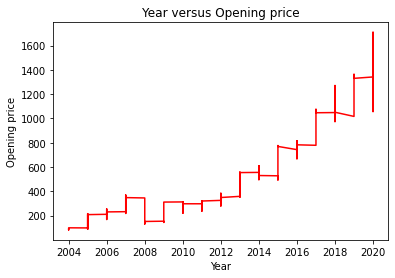

In [18]:
plt.title("Year versus Opening price")
plt.xlabel("Year")
plt.ylabel("Opening price")
plt.plot(year,open,'red')
plt.show()

<h1><b><u>Observation</u></b></h1>
<h3>As evident from the plot that the equity performance of Google has increased overtime span of 2004 to 2020 drastically. If we observe the graph from 2015 onwards, there is an exponential rise in the graph with large monthly(seasonal) fluctuations. These fluctuations are getting bigger and bigger over time but on average the stocks have performed significantly well.</h3>

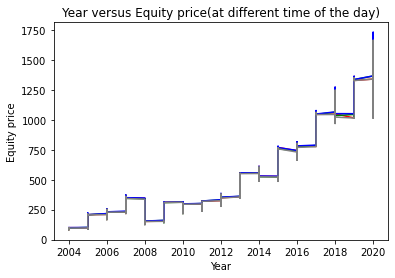

In [19]:
plt.title("Year versus Equity price(at different time of the day)")
plt.xlabel("Year")
plt.ylabel("Equity price")
plt.plot(year,open,'red',year,close,'green',year,high,'blue',year,low,'gray')
plt.show()

<h2><b><u>Assertion</u></b></h2>
<h4>This plot is is to show that there no signficant difference between opening, closing, high or low prices on average as their correlation is very high. This is the reason I can choose any one of these as my target variable and the model trained on that will perform well on other prices as well.</h4>

In [20]:
# data aggregation
X=[]
Y=[]
for i in range(open.shape[0]):
  temp=[]
  temp.append(year[i])
  temp.append(month[i])
  temp.append(day[i])
  X.append(temp)
  Y.append(open[i])
X=np.array(X)
Y=np.array(Y)

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,shuffle=False)

In [22]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2820, 3), (1209, 3), (2820,), (1209,))

In [23]:
# support vector machine regressor.
svm_regr=SVR(C=0.25)

In [24]:
svm_regr.fit(X_train,Y_train)

SVR(C=0.25, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
prediction=svm_regr.predict(X_test)

In [26]:
print("R^2 score of SVM regressor is  : "+str(svm_regr.score(X_test,Y_test)))

R^2 score of SVM regressor is  : -10.807275210374838


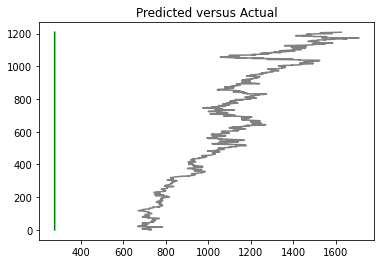

In [27]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

This asserts that the SVM regressor model is not suited for this kind of dataset as it has performed very poorly in the test. Not at all generalized and the R^2 score is worse.

In [28]:
# Polynomial regression.
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
regr_poly=LinearRegression()
regr_poly.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("R^2 score of Polynomial regression is  : "+str(regr_poly.score(X_test_poly,Y_test)))

R^2 score of Polynomial regression is  : 0.3763039593820272


This is a very good R^2 score and thus we can say that our model was able to generalize on the data pretty well.

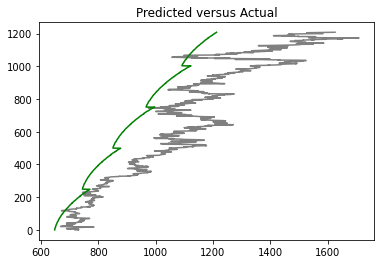

In [30]:
prediction=regr_poly.predict(X_test_poly)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

This graph have high percentage of overlap between actual and predicted values as compared to higher degree polynomials thus degree=2 polynomial fitting curve is optimum for the provided data.

In [31]:
# multi layer perceptron.
regr=MLPRegressor(hidden_layer_sizes=(8,16,8),learning_rate='adaptive',learning_rate_init=0.0001)
regr.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 16, 8), learning_rate='adaptive',
             learning_rate_init=0.0001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [32]:
print("R^2 score of MLP(Multi Layered Perceptron) Regressor is  : "+str(regr.score(X_test,Y_test)))

R^2 score of MLP(Multi Layered Perceptron) Regressor is  : -9.645243419034214


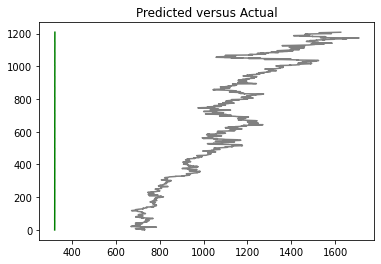

In [33]:
prediction=regr.predict(X_test)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

MLP regressor is not performing any better than polynomial regression and have a very poor R^2 score. 

In [34]:
# Convolutional Neural Network
n_steps=3
n_features=4
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 64)             576       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [35]:
# convert X_train, X_test, Y_train, Y_test in sequence of 3 steps.
def sequencify(data,label,steps):
  seq=[]
  labs=[]
  for i in range(data.shape[0] - steps):
    temp=[]
    for j in range(i,i+steps):
      temp1=[]
      temp1.append(data[j][0])
      temp1.append(data[j][1])
      temp1.append(data[j][2])
      temp1.append(label[j])
      temp.append(temp1)
    labs.append(label[i+n_steps])
    seq.append(temp)
  seq=np.array(seq)
  labs=np.array(labs)
  return seq,labs

In [36]:
seq_train,labs_train=sequencify(X_train,Y_train,n_steps)
seq_test,labs_test=sequencify(X_test,Y_test,n_steps)

In [37]:
labs_train=labs_train.reshape(labs_train.shape[0],1)
labs_test=labs_test.reshape(labs_test.shape[0],1)

In [38]:
history=cnn_model.fit(seq_train,labs_train,epochs=15,batch_size=8,validation_data=(seq_test,labs_test),shuffle=False)

Epoch 1/15
353/353 [==============================] - 1s 2ms/step - loss: 2457.3538 - mse: 2457.3538 - val_loss: 117568.6797 - val_mse: 117568.6797
Epoch 2/15
353/353 [==============================] - 0s 1ms/step - loss: 4784.5591 - mse: 4784.5591 - val_loss: 88585.1172 - val_mse: 88585.1172
Epoch 3/15
353/353 [==============================] - 1s 1ms/step - loss: 4206.3857 - mse: 4206.3857 - val_loss: 49924.0312 - val_mse: 49924.0312
Epoch 4/15
353/353 [==============================] - 0s 1ms/step - loss: 3171.3870 - mse: 3171.3870 - val_loss: 31048.4316 - val_mse: 31048.4316
Epoch 5/15
353/353 [==============================] - 0s 1ms/step - loss: 2815.3586 - mse: 2815.3586 - val_loss: 20189.2832 - val_mse: 20189.2832
Epoch 6/15
353/353 [==============================] - 0s 1ms/step - loss: 1538.0720 - mse: 1538.0720 - val_loss: 12600.9502 - val_mse: 12600.9502
Epoch 7/15
353/353 [==============================] - 0s 1ms/step - loss: 850.7437 - mse: 850.7437 - val_loss: 7451.0889 -

In [39]:
prediction=cnn_model.predict(seq_test)

In [40]:
def debug_prediction(n):
  #assert n<labs_test.shape[1] , "Please enter a value less than or equal to size of testing set."
  print("EXAMPLE : ")
  print("for input sequence : "+str(seq_test[n])+"\n the actual value is : "+str(labs_test[n])+"\n the predicted value is : "+str(prediction[n]))

In [41]:
debug_prediction(10)

EXAMPLE : 
for input sequence : [[2.01600000e+03 1.00000000e+00 2.20000000e+01 7.23599976e+02]
 [2.01600000e+03 1.00000000e+00 2.50000000e+01 7.23580017e+02]
 [2.01600000e+03 1.00000000e+00 2.60000000e+01 7.13849976e+02]]
 the actual value is : [713.669983]
 the predicted value is : [728.301]


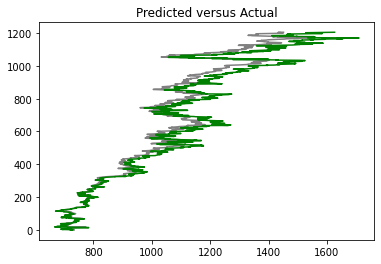

In [42]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

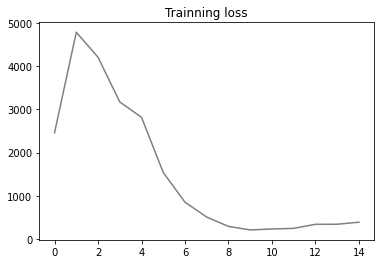

In [43]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

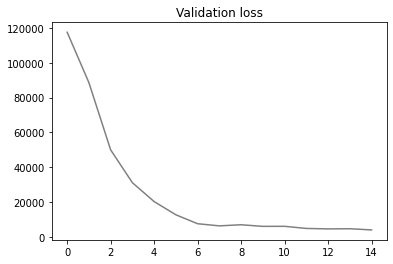

In [44]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')#,val_loss,dummy,'green')
plt.show()

This is the evidence that CNNs are very good at generalizing time series data. Since our context size is 3 so the prediction accuracy is high. If we choose a higher context size then prediction will be affected but speed of the model will get boosted drastically.

In [45]:
# Long Short Term Memory Network
lstm_model = Sequential()
lstm_model.add(LSTM(50,activation='relu',input_shape=(n_steps,n_features),return_sequences=True))
lstm_model.add(Dropout(0.25))
lstm_model.add(Bidirectional(LSTM(50,activation='relu')))
lstm_model.add(Flatten())
lstm_model.add(Dense(100,activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 50)             11000     
_________________________________________________________________
dropout (Dropout)            (None, 3, 50)             0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               40400     
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 61,601
Trainable params: 61,601
Non-trainable params: 0
__________________________________________________

In [46]:
history=lstm_model.fit(seq_train,labs_train,epochs=15,batch_size=8,validation_data=(seq_test,labs_test),shuffle=False)

Epoch 1/15
353/353 [==============================] - 2s 6ms/step - loss: 2788.7612 - mse: 2788.7612 - val_loss: 253495.8750 - val_mse: 253495.8750
Epoch 2/15
353/353 [==============================] - 2s 5ms/step - loss: 8868.1680 - mse: 8868.1680 - val_loss: 91210.0781 - val_mse: 91210.0781
Epoch 3/15
353/353 [==============================] - 2s 5ms/step - loss: 7971.0215 - mse: 7971.0215 - val_loss: 208516.4688 - val_mse: 208516.4688
Epoch 4/15
353/353 [==============================] - 2s 5ms/step - loss: 6839.0215 - mse: 6839.0215 - val_loss: 123360.6875 - val_mse: 123360.6875
Epoch 5/15
353/353 [==============================] - 2s 5ms/step - loss: 6271.0088 - mse: 6271.0088 - val_loss: 158784.8125 - val_mse: 158784.8125
Epoch 6/15
353/353 [==============================] - 2s 5ms/step - loss: 4601.0098 - mse: 4601.0098 - val_loss: 159208.6719 - val_mse: 159208.6719
Epoch 7/15
353/353 [==============================] - 2s 5ms/step - loss: 3746.4282 - mse: 3746.4282 - val_loss: 1

In [47]:
prediction=lstm_model.predict(seq_test)

In [48]:
debug_prediction(10)

EXAMPLE : 
for input sequence : [[2.01600000e+03 1.00000000e+00 2.20000000e+01 7.23599976e+02]
 [2.01600000e+03 1.00000000e+00 2.50000000e+01 7.23580017e+02]
 [2.01600000e+03 1.00000000e+00 2.60000000e+01 7.13849976e+02]]
 the actual value is : [713.669983]
 the predicted value is : [547.18164]


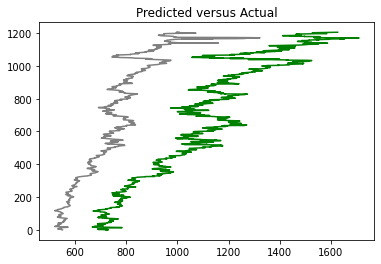

In [49]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

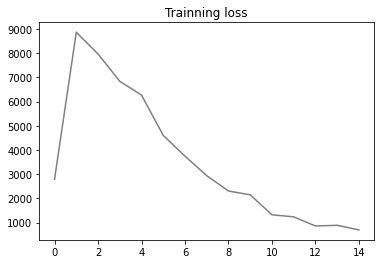

In [50]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

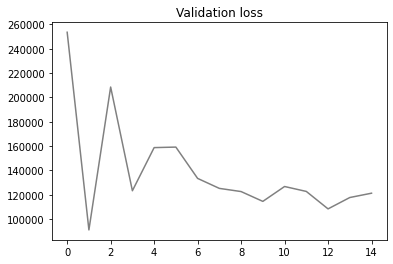

In [51]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')
plt.show()

LSTM model is more suited for time series data when the size of dataset is large enough but is also prone to overfitting which is prevented using dropout layer. 

Now we have tried several models on the data and found that LSTM, CNN and polynomial regression are only models that generalized over the dataset and was able to produce viable results out of all mentioned models at the start. <br>
We can to use these models to forecast the prices of equity owned by google in the future based on the trend captured while trainning. 

<b>Nvidea</b> acquired <b>ARM</b> in 2016 which was one of the biggest business aquisitions of the decade and has impacted a larger sphere of corporate firms who had stakes in either of those firms.<br> 
My agenda is to uncover the benifit/loss of incurred to Nvidea due to this aquisition.

In [52]:
dataset=pd.read_csv("NVDA.csv")

In [53]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-10-24,11.291667,11.479167,10.937500,10.979167,10.097367,4849200
1,2000-10-25,10.677083,10.833333,9.947917,10.020833,9.216006,9637800
2,2000-10-26,10.083333,10.833333,9.375000,10.447917,9.608786,6644400
3,2000-10-27,10.458333,10.716146,9.833333,10.208333,9.388443,5274000
4,2000-10-30,10.041667,10.268229,9.479167,9.489583,8.727420,4803000


In [54]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5027,2020-10-19,556.119995,559.340027,536.270020,539.909973,539.909973,7451700
5028,2020-10-20,543.340027,551.989990,540.280029,545.820007,545.820007,5730300
5029,2020-10-21,545.000000,551.659973,539.099976,540.989990,540.989990,5489900
5030,2020-10-22,540.900024,544.469971,529.270020,534.440002,534.440002,7262000
5031,2020-10-23,538.000000,543.729980,531.650024,543.609985,543.609985,5829900


In [55]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,56.434212,57.386316,55.436808,56.447918,55.444192,1.648321e+07
std,92.800825,94.325919,91.166037,92.824881,92.869011,1.143284e+07
min,2.433333,2.626667,2.400000,2.456667,2.259358,1.141100e+06
25%,11.267500,11.500000,10.966563,11.277708,10.371933,9.327000e+06
50%,16.205000,16.568334,15.876666,16.195001,15.014472,1.387395e+07
75%,32.452500,32.965000,32.025000,32.512500,31.070843,2.016450e+07
max,588.150024,589.070007,560.750000,573.859985,573.859985,2.307714e+08


Total size of the dataset is 5032 and counts of non NAN columns as in the table above asserts that there is no NAN values present in the dataset. This saved me from additional data preprocessing process.

In [56]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999839,0.999776,0.999621,0.999604,-0.138283
High,0.999839,1.000000,0.999740,0.999813,0.999802,-0.135830
Low,0.999776,0.999740,1.000000,0.999831,0.999810,-0.141539
Close,0.999621,0.999813,0.999831,1.000000,0.999984,-0.138693
Adj Close,0.999604,0.999802,0.999810,0.999984,1.000000,-0.138845
Volume,-0.138283,-0.135830,-0.141539,-0.138693,-0.138845,1.000000


The correlation matrix shows that the prices of stocks at varied interval of time of the day negatively impacts the volume of equities traded in the market which is in accordance with the general intuition that "costlier the comodity fewer will be it's sale". 
<br> <b>Note :</b> The most equities traded is when the equity price is lowest for the day.
<br>Same as above found in Google dataset as well.

In [57]:
# assigning dedicated arrays to the specific columns (helpful in preprocessing and visualization).
## since this data is also from the same repository as is our above i.e. google stocks data this is why the column convention is same.
dates=dataset["Date"].values
open=dataset["Open"].values
low=dataset["Low"].values
close=dataset["Close"].values
high=dataset["High"].values

In [58]:
year=[]
month=[]
day=[]
for i in dates:
  temp=i.split('-')
  year.append(int(temp[0]))
  month.append(int(temp[1]))
  day.append(int(temp[2]))

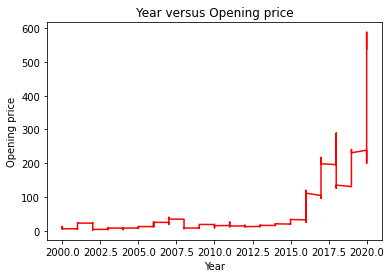

In [59]:
plt.title("Year versus Opening price")
plt.xlabel("Year")
plt.ylabel("Opening price")
plt.plot(year,open,'red')
plt.show()

<h1><b><u>Observation</u></b></h1>
<h3>From this graph it is evident that the aqusition of ARM by Nvidea has been a profitable move. Before 2016 the opening prices are nevertheless constant and are under 100(USD) mark but after 2016 the growth shoots almost vertically to whoping 600(USD) mark.</h3>

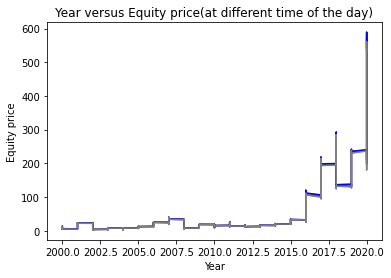

In [60]:
plt.title("Year versus Equity price(at different time of the day)")
plt.xlabel("Year")
plt.ylabel("Equity price")
plt.plot(year,open,'red',year,close,'green',year,high,'blue',year,low,'gray')
plt.show()

<h2><b><u>Assertion</u></b></h2>
<h4>This plot is is to show that there no signficant difference between opening, closing, high or low prices on average as their correlation is very high. This is the reason I can choose any one of these as my target variable and the model trained on that will perform well on other prices as well.</h4>

In [61]:
# data aggregation
X=[]
Y=[]
for i in range(open.shape[0]):
  temp=[]
  temp.append(year[i])
  temp.append(month[i])
  temp.append(day[i])
  X.append(temp)
  Y.append(open[i])
X=np.array(X)
Y=np.array(Y)

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,shuffle=False)

In [63]:
# support vector machine regressor.
svm_regr=SVR(C=0.25)

In [64]:
svm_regr.fit(X_train,Y_train)

SVR(C=0.25, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
prediction=svm_regr.predict(X_test)

In [66]:
print("R^2 score of SVM regressor is  : "+str(svm_regr.score(X_test,Y_test)))

R^2 score of SVM regressor is  : -1.4074120367384206


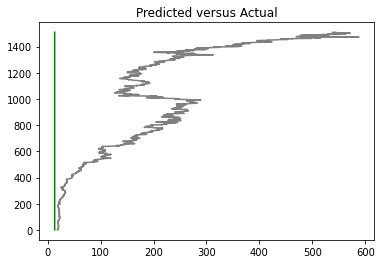

In [67]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

This asserts that the SVM regressor model is not suited for this kind of dataset as it has performed very poorly in the test. Not at all generalized and the R^2 score is worse.

In [68]:
# Polynomial regression.
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
regr_poly=LinearRegression()
regr_poly.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print("R^2 score of Polynomial regression is  : "+str(regr_poly.score(X_test_poly,Y_test)))

R^2 score of Polynomial regression is  : -1.4485695043779092


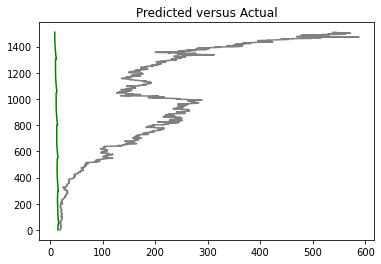

In [70]:
prediction=regr_poly.predict(X_test_poly)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

For this dataset polynomial regression is performing very poorly. which is quite evident from the graph and R^2 score.

In [71]:
# multi layer perceptron.
regr=MLPRegressor(hidden_layer_sizes=(8,16,8),learning_rate='adaptive',learning_rate_init=0.0001)
regr.fit(X_train,Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 16, 8), learning_rate='adaptive',
             learning_rate_init=0.0001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [72]:
print("R^2 score of MLP(Multi Layered Perceptron) Regressor is  : "+str(regr.score(X_test,Y_test)))

R^2 score of MLP(Multi Layered Perceptron) Regressor is  : -1.3957475782662314


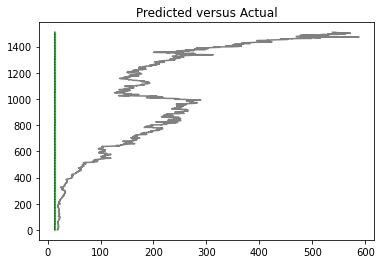

In [73]:
prediction=regr.predict(X_test)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

MLP is not able to generalize on the dataset at all and thus is performing equally poor as prior models.

In [74]:
# Convolutional Neural Network
n_steps=3
n_features=4
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             576       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [75]:
seq_train,labs_train=sequencify(X_train,Y_train,n_steps)
seq_test,labs_test=sequencify(X_test,Y_test,n_steps)

In [76]:
labs_train=labs_train.reshape(labs_train.shape[0],1)
labs_test=labs_test.reshape(labs_test.shape[0],1)

In [77]:
history=cnn_model.fit(seq_train,labs_train,epochs=100,batch_size=8,validation_data=(seq_test,labs_test),shuffle=False)

Epoch 1/100
440/440 [==============================] - 1s 2ms/step - loss: 228.0538 - mse: 228.0538 - val_loss: 35896.0547 - val_mse: 35896.0547
Epoch 2/100
440/440 [==============================] - 1s 1ms/step - loss: 10.5704 - mse: 10.5704 - val_loss: 37469.8516 - val_mse: 37469.8516
Epoch 3/100
440/440 [==============================] - 1s 1ms/step - loss: 11.8743 - mse: 11.8743 - val_loss: 38220.1445 - val_mse: 38220.1445
Epoch 4/100
440/440 [==============================] - 1s 1ms/step - loss: 9.0367 - mse: 9.0367 - val_loss: 40590.0977 - val_mse: 40590.0977
Epoch 5/100
440/440 [==============================] - 1s 1ms/step - loss: 14.4207 - mse: 14.4207 - val_loss: 39447.9922 - val_mse: 39447.9922
Epoch 6/100
440/440 [==============================] - 1s 1ms/step - loss: 14.3554 - mse: 14.3554 - val_loss: 40496.7383 - val_mse: 40496.7383
Epoch 7/100
440/440 [==============================] - 1s 1ms/step - loss: 14.4509 - mse: 14.4509 - val_loss: 41498.4219 - val_mse: 41498.4219

In [78]:
prediction=cnn_model.predict(seq_test)

In [79]:
debug_prediction(100)

EXAMPLE : 
for input sequence : [[2015.          3.         23.         22.77    ]
 [2015.          3.         24.         22.639999]
 [2015.          3.         25.         22.389999]]
 the actual value is : [20.610001]
 the predicted value is : [21.22087]


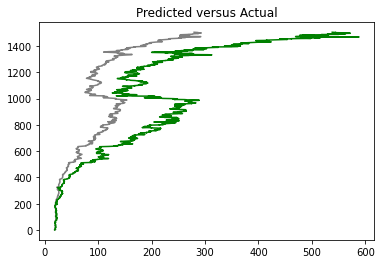

In [80]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

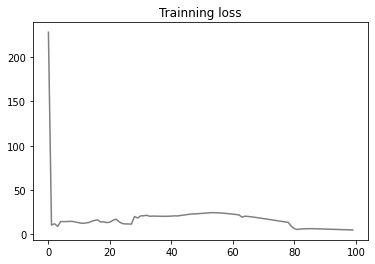

In [81]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

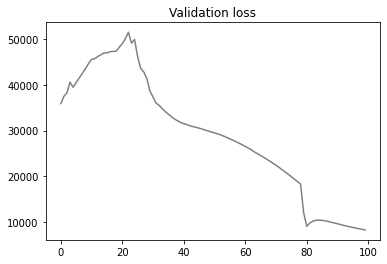

In [82]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')#,val_loss,dummy,'green')
plt.show()

This loss distribution contains many local minima so the convergence of model to one of them takes experimentation with hyperparameters. Though this set of parameters has performed well in this case (found by hit and trial). 

In [83]:
# Long Short Term Memory Network
lstm_model = Sequential()
lstm_model.add(LSTM(50,activation='relu',input_shape=(n_steps,n_features),return_sequences=True))
lstm_model.add(Dropout(0.1))
lstm_model.add(Bidirectional(LSTM(50,activation='relu')))
lstm_model.add(Flatten())
lstm_model.add(Dense(100,activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 50)             11000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               40400     
_________________________________________________________________
flatten_3 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 61,601
Trainable params: 61,601
Non-trainable params: 0
__________________________________________________

In [84]:
history=lstm_model.fit(seq_train,labs_train,epochs=100,batch_size=8,validation_data=(seq_test,labs_test),shuffle=False)

Epoch 1/100
440/440 [==============================] - 3s 6ms/step - loss: 86.0415 - mse: 86.0415 - val_loss: 33686.3086 - val_mse: 33686.3086
Epoch 2/100
440/440 [==============================] - 2s 5ms/step - loss: 26.0665 - mse: 26.0665 - val_loss: 33514.6523 - val_mse: 33514.6523
Epoch 3/100
440/440 [==============================] - 2s 5ms/step - loss: 25.8243 - mse: 25.8243 - val_loss: 33616.2539 - val_mse: 33616.2539
Epoch 4/100
440/440 [==============================] - 2s 5ms/step - loss: 23.8395 - mse: 23.8395 - val_loss: 33384.2461 - val_mse: 33384.2461
Epoch 5/100
440/440 [==============================] - 2s 5ms/step - loss: 23.5903 - mse: 23.5903 - val_loss: 33383.9062 - val_mse: 33383.9062
Epoch 6/100
440/440 [==============================] - 2s 5ms/step - loss: 22.8265 - mse: 22.8265 - val_loss: 33277.0547 - val_mse: 33277.0547
Epoch 7/100
440/440 [==============================] - 2s 5ms/step - loss: 23.2210 - mse: 23.2210 - val_loss: 32872.3867 - val_mse: 32872.3867

In [85]:
prediction=lstm_model.predict(seq_test)

In [86]:
debug_prediction(10)

EXAMPLE : 
for input sequence : [[2014.         11.         10.         19.77    ]
 [2014.         11.         11.         19.9     ]
 [2014.         11.         12.         19.709999]]
 the actual value is : [19.719999]
 the predicted value is : [15.067591]


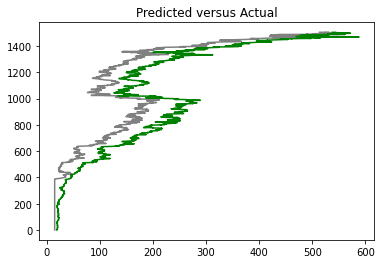

In [87]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

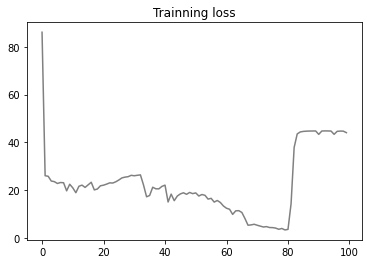

In [88]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

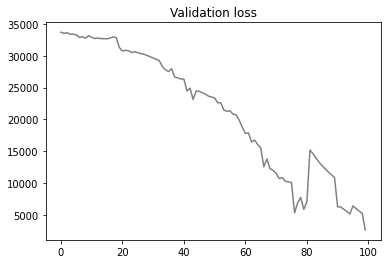

In [89]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')
plt.show()

<b>Note : </b> The loss versus iteration number plot provides us with great insights about the optimal epochs that can be used. From the plot above it is evident that epochs~(common dipping point) is very good as both validation set and trainning set has minimum loss on that iteration point.
<br>
LSTM is prevented from overfitting due to which there is distinction between prediction and actual values.

Now we have tried several models on the data and found that LSTM and CNN are only models that generalized over the dataset and was able to produce viable results out of all mentioned models at the start. <br>
We can use these models to forecast the prices of equity owned by Nvidea in the future based on the trend captured while trainning. 

Steve Jobs returned as CEO of Apple Inc. in 1997 after being terminated by board members in 1985 and remained in the comapany untill he announced his retirement in 2011. He retired after making Apple acheive newer heights and was with the company he cofounded with Steve Wozniak. <br>
I am interested in studying the trend of stock price of Apple Inc. in that course of time and try to find some models that can fit on that data for future prediction based on captured trends.

In [90]:
dataset=pd.read_csv("AAPL.csv")

In [91]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-02,0.130022,0.130022,0.124442,0.124442,0.098179,175302400
1,1985-01-03,0.126674,0.130022,0.126674,0.126674,0.099940,166611200
2,1985-01-04,0.126674,0.127232,0.125000,0.126674,0.099940,137267200
3,1985-01-07,0.126674,0.127232,0.126116,0.126116,0.099500,170912000
4,1985-01-08,0.126116,0.127232,0.125000,0.125000,0.098619,141120000


In [92]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6737,2011-09-19,14.178572,14.758214,14.114285,14.701072,12.703772,823860800
6738,2011-09-20,14.830358,15.102143,14.685357,14.766071,12.759943,775754000
6739,2011-09-21,14.987143,15.056786,14.714286,14.719286,12.719510,605976000
6740,2011-09-22,14.322500,14.636429,14.167857,14.350715,12.401018,968480800
6741,2011-09-23,14.295714,14.526428,14.280357,14.439285,12.477550,546277200


In [93]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6.742000e+03
mean,1.678850,1.701581,1.653524,1.678392,1.444248,4.096615e+08
std,2.878700,2.907793,2.844792,2.878279,2.490031,3.797070e+08
min,0.065290,0.065848,0.064732,0.064732,0.051071,2.396800e+06
25%,0.294643,0.301339,0.287946,0.294643,0.245953,1.677480e+08
50%,0.392857,0.399554,0.383929,0.392857,0.326367,2.851996e+08
75%,1.247232,1.273617,1.216161,1.247500,1.078013,5.183206e+08
max,14.987143,15.102143,14.714286,14.766071,12.759943,7.421641e+09


Total size of the dataset is 6742 and counts of non NAN columns as in the table above asserts that there is no NAN values present in the dataset. This saved me from additional data preprocessing process.

In [94]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999924,0.999852,0.999812,0.999806,0.354538
High,0.999924,1.000000,0.999823,0.999908,0.999905,0.357913
Low,0.999852,0.999823,1.000000,0.999885,0.999876,0.349331
Close,0.999812,0.999908,0.999885,1.000000,0.999994,0.353775
Adj Close,0.999806,0.999905,0.999876,0.999994,1.000000,0.354737
Volume,0.354538,0.357913,0.349331,0.353775,0.354737,1.000000


There is change in trend of volume of stocks traded as here, more the price of stock more it is bought. Which is in contradiction with our intuition. 

In [95]:
# assigning dedicated arrays to the specific columns (helpful in preprocessing and visualization).
## since this data is also from the same repository as is our above i.e. google stocks data and Nvidea stocks data this is why the column convention is same.
dates=dataset["Date"].values
open=dataset["Open"].values
low=dataset["Low"].values
close=dataset["Close"].values
high=dataset["High"].values

In [96]:
year=[]
month=[]
day=[]
for i in dates:
  temp=i.split('-')
  year.append(int(temp[0]))
  month.append(int(temp[1]))
  day.append(int(temp[2]))

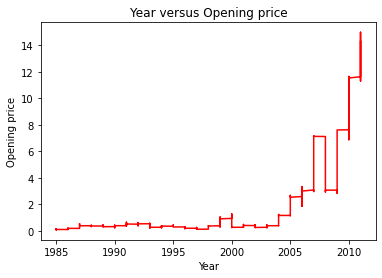

In [97]:
plt.title("Year versus Opening price")
plt.xlabel("Year")
plt.ylabel("Opening price")
plt.plot(year,open,'red')
plt.show()

<h1><b><u>Observation</u><b></h1>
<h3>There is very gradual(almost constant) increase in prices of equities untill 2005 and this is the point when it starts to shoot up and is evrgrowing since then. So, the effectiveness of Steve Jobs as CEO started to make prominence from 2005 and after that Apple has never seen any setback. <h3>

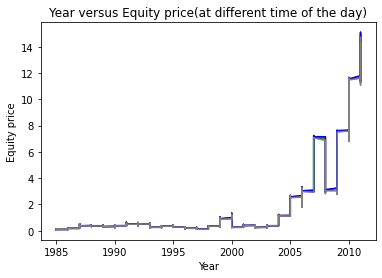

In [98]:
plt.title("Year versus Equity price(at different time of the day)")
plt.xlabel("Year")
plt.ylabel("Equity price")
plt.plot(year,open,'red',year,close,'green',year,high,'blue',year,low,'gray')
plt.show()

<h2><b><u>Assertion</u></b></h2>
<h4>This plot is is to show that there no signficant difference between opening, closing, high or low prices on average as their correlation is very high. This is the reason I can choose any one of these as my target variable and the model trained on that will perform well on other prices as well.</h4>

In [99]:
# data aggregation
X=[]
Y=[]
for i in range(open.shape[0]):
  temp=[]
  temp.append(year[i])
  temp.append(month[i])
  temp.append(day[i])
  X.append(temp)
  Y.append(open[i])
X=np.array(X)
Y=np.array(Y)

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,shuffle=False)

In [101]:
# support vector machine regressor.
svm_regr=SVR(degree=2)

In [102]:
svm_regr.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [103]:
prediction=svm_regr.predict(X_test)

In [104]:
print("R^2 score of SVM regressor is  : "+str(svm_regr.score(X_test,Y_test)))

R^2 score of SVM regressor is  : -1.4135073393368829


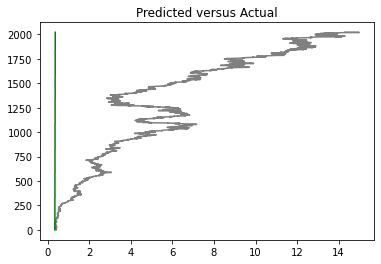

In [105]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

As expected, SVM regressor is performing very poorly on the dataset.

In [106]:
# Polynomial regression.
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
regr_poly=LinearRegression()
regr_poly.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
print("R^2 score of Polynomial regression is  : "+str(regr_poly.score(X_test_poly,Y_test)))

R^2 score of Polynomial regression is  : -1.4863282600931673


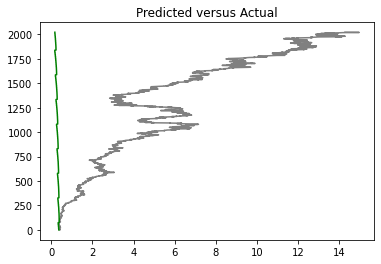

In [108]:
prediction=regr_poly.predict(X_test_poly)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

Polynomial regression is also not able to genralize on this model and thus performing very poorly.

In [109]:
# multi layer perceptron.
regr=MLPRegressor(hidden_layer_sizes=(8,16,8),learning_rate='adaptive',learning_rate_init=0.0001)
regr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 16, 8), learning_rate='adaptive',
             learning_rate_init=0.0001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [110]:
print("R^2 score of MLP(Multi Layered Perceptron) Regressor is  : "+str(regr.score(X_test,Y_test)))

R^2 score of MLP(Multi Layered Perceptron) Regressor is  : -1.6195003543313784


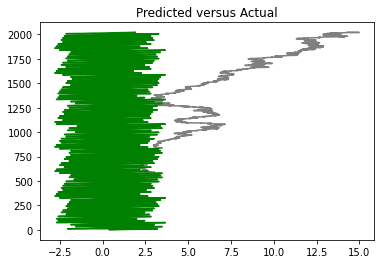

In [111]:
prediction=regr.predict(X_test)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

Fluctuations in the data caused MLP to perform very poorly.

In [112]:
# Convolutional Neural Network
n_steps=3
n_features=4
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
cnn_model.add(Dropout(0.25))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2, 128)            1152      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 128)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [113]:
seq_train,labs_train=sequencify(X_train,Y_train,n_steps)
seq_test,labs_test=sequencify(X_test,Y_test,n_steps)

In [114]:
labs_train=labs_train.reshape(labs_train.shape[0],1)
labs_test=labs_test.reshape(labs_test.shape[0],1)

In [115]:
history=cnn_model.fit(seq_train,labs_train,epochs=10,batch_size=1,validation_data=(seq_test,labs_test),shuffle=True)

Epoch 1/10
4716/4716 [==============================] - 6s 1ms/step - loss: 274.8242 - mse: 274.8242 - val_loss: 32.8125 - val_mse: 32.8125
Epoch 2/10
4716/4716 [==============================] - 6s 1ms/step - loss: 0.3040 - mse: 0.3040 - val_loss: 34.1525 - val_mse: 34.1525
Epoch 3/10
4716/4716 [==============================] - 6s 1ms/step - loss: 0.3599 - mse: 0.3599 - val_loss: 33.3975 - val_mse: 33.3975
Epoch 4/10
4716/4716 [==============================] - 6s 1ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 33.3924 - val_mse: 33.3924
Epoch 5/10
4716/4716 [==============================] - 6s 1ms/step - loss: 0.1716 - mse: 0.1716 - val_loss: 33.3480 - val_mse: 33.3480
Epoch 6/10
4716/4716 [==============================] - 6s 1ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 33.4867 - val_mse: 33.4867
Epoch 7/10
4716/4716 [==============================] - 6s 1ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 33.3752 - val_mse: 33.3752
Epoch 8/10
4716/4716 [======================

In [116]:
prediction=cnn_model.predict(seq_test)

In [117]:
debug_prediction(100)

EXAMPLE : 
for input sequence : [[2.00400e+03 2.00000e+00 6.00000e+00 4.00893e-01]
 [2.00400e+03 2.00000e+00 9.00000e+00 4.03929e-01]
 [2.00400e+03 2.00000e+00 1.00000e+01 4.03929e-01]]
 the actual value is : [0.412321]
 the predicted value is : [0.35526696]


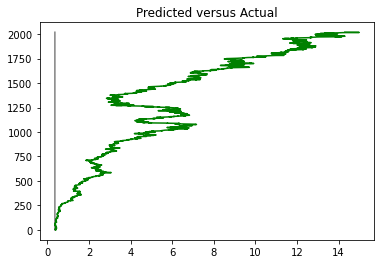

In [118]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

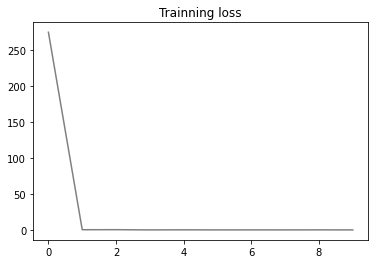

In [119]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

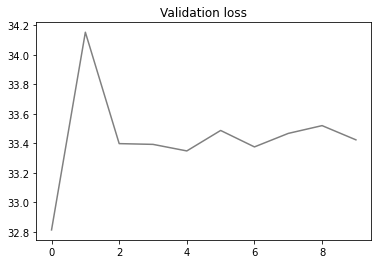

In [120]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')
plt.show()

This model is majorly affected by overfitting as validation loss and trainning loss is following inverse relationship that too with exponential factor making the model worse. Need automated hyper parameter tuning to save the model from doom.

In [121]:
# Long Short Term Memory Network
lstm_model = Sequential()
lstm_model.add(LSTM(50,activation='relu',input_shape=(n_steps,n_features),return_sequences=True))
lstm_model.add(Dropout(0.25))
lstm_model.add(Bidirectional(LSTM(50,activation='relu')))
lstm_model.add(Flatten())
lstm_model.add(Dense(100,activation='relu'))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 50)             11000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               40400     
_________________________________________________________________
flatten_5 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [122]:
history=lstm_model.fit(seq_train,labs_train,epochs=100,batch_size=8,validation_data=(seq_test,labs_test),shuffle=True)

Epoch 1/100
590/590 [==============================] - 3s 6ms/step - loss: 77.8578 - mse: 77.8578 - val_loss: 35.4894 - val_mse: 35.4894
Epoch 2/100
590/590 [==============================] - 3s 5ms/step - loss: 1.8974 - mse: 1.8974 - val_loss: 35.7463 - val_mse: 35.7463
Epoch 3/100
590/590 [==============================] - 3s 5ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 34.1443 - val_mse: 34.1443
Epoch 4/100
590/590 [==============================] - 3s 5ms/step - loss: 0.1250 - mse: 0.1250 - val_loss: 34.4824 - val_mse: 34.4824
Epoch 5/100
590/590 [==============================] - 3s 5ms/step - loss: 0.0650 - mse: 0.0650 - val_loss: 34.1992 - val_mse: 34.1992
Epoch 6/100
590/590 [==============================] - 3s 5ms/step - loss: 0.0459 - mse: 0.0459 - val_loss: 34.5002 - val_mse: 34.5002
Epoch 7/100
590/590 [==============================] - 3s 5ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 33.3877 - val_mse: 33.3877
Epoch 8/100
590/590 [==============================] 

In [123]:
prediction=lstm_model.predict(seq_test)

In [124]:
debug_prediction(100)

EXAMPLE : 
for input sequence : [[2.00400e+03 2.00000e+00 6.00000e+00 4.00893e-01]
 [2.00400e+03 2.00000e+00 9.00000e+00 4.03929e-01]
 [2.00400e+03 2.00000e+00 1.00000e+01 4.03929e-01]]
 the actual value is : [0.412321]
 the predicted value is : [0.35670424]


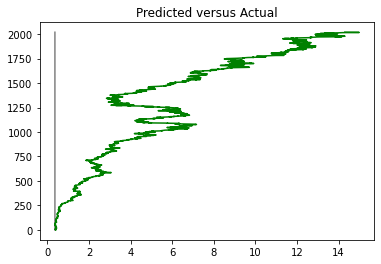

In [125]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

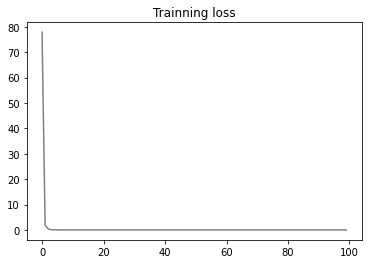

In [126]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

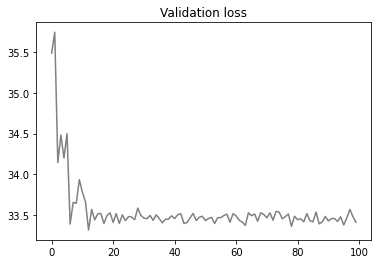

In [127]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')
plt.show()

The values being so close to each other leads to model passing through huge fluctuations in loss. This data requires a lot of preprocessing for our model to generalize well.

Microsoft Inc. acquired linkedin in 2016. I am interested in analysing wheather this aquisition is good or bad.

In [128]:
dataset=pd.read_csv("MSFT.csv")

In [129]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-24,51.898438,52.84375,50.40625,50.62500,32.312943,63597600
1,2000-01-25,50.500000,51.93750,49.78125,51.40625,32.811600,59823200
2,2000-01-26,51.218750,51.75000,49.56250,49.68750,31.714558,49365000
3,2000-01-27,49.945313,50.59375,48.62500,49.37500,31.515091,63654800
4,2000-01-28,49.062500,50.12500,48.62500,49.12500,31.355532,58225400


In [130]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5218,2020-10-19,220.419998,222.300003,213.720001,214.220001,214.220001,27625800
5219,2020-10-20,215.800003,217.369995,213.089996,214.649994,214.649994,22753500
5220,2020-10-21,213.119995,216.919998,213.119995,214.800003,214.800003,22724900
5221,2020-10-22,213.929993,216.059998,211.699997,214.889999,214.889999,22351500
5222,2020-10-23,215.029999,216.279999,213.160004,216.229996,216.229996,18841600


In [131]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5223.000000,5223.000000,5223.000000,5223.000000,5223.000000,5.223000e+03
mean,47.970773,48.474268,47.458680,47.979460,41.755322,5.469063e+07
std,39.751753,40.170472,39.295855,39.767671,41.714913,3.134742e+07
min,15.200000,15.620000,14.870000,15.150000,11.638612,7.425600e+06
25%,26.665000,26.930000,26.379999,26.634999,19.115747,3.252070e+07
50%,30.040001,30.389999,29.795000,30.049999,22.471689,4.985420e+07
75%,48.645000,49.049999,48.065000,48.670000,42.732998,6.820890e+07
max,229.270004,232.860001,227.350006,231.649994,231.649994,5.910522e+08


Total size of the dataset is 5223 and counts of non NAN columns as in the table above asserts that there is no NAN values present in the dataset. This saved me from additional data preprocessing process.

In [132]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999862,0.999848,0.999723,0.997907,-0.378955
High,0.999862,1.000000,0.999753,0.999835,0.997881,-0.374793
Low,0.999848,0.999753,1.000000,0.999855,0.998157,-0.383578
Close,0.999723,0.999835,0.999855,1.000000,0.998176,-0.379596
Adj Close,0.997907,0.997881,0.998157,0.998176,1.000000,-0.394737
Volume,-0.378955,-0.374793,-0.383578,-0.379596,-0.394737,1.000000


The correlation matrix shows that the prices of stocks at varied interval of time of the day negatively impacts the volume of equities traded in the market which is in accordance with the general intuition that "costlier the comodity fewer will be it's sale".<br>
<b>Note :</b> The most equities traded is when the equity price is lowest for the day.<br>
Same as above found in Google dataset as well.

In [133]:
# assigning dedicated arrays to the specific columns (helpful in preprocessing and visualization).
## since this data is also from the same repository as is our above i.e. google stocks data and Nvidea stocks data this is why the column convention is same.
dates=dataset["Date"].values
open=dataset["Open"].values
low=dataset["Low"].values
close=dataset["Close"].values
high=dataset["High"].values

In [134]:
year=[]
month=[]
day=[]
for i in dates:
  temp=i.split('-')
  year.append(int(temp[0]))
  month.append(int(temp[1]))
  day.append(int(temp[2]))

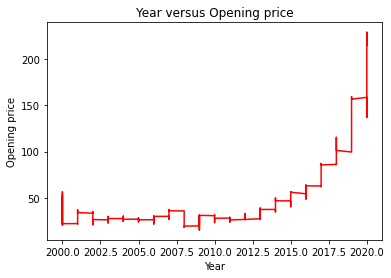

In [135]:
plt.title("Year versus Opening price")
plt.xlabel("Year")
plt.ylabel("Opening price")
plt.plot(year,open,'red')
plt.show()

<h1><b><u>Observation</u><b></h1>
<h3>The growth of Microsoft remained contant untill 2012 and then started to increase gradually untill 2015. From year 2016 we can observe that the growth of the firm shoots up with an exponential rate.<h3>

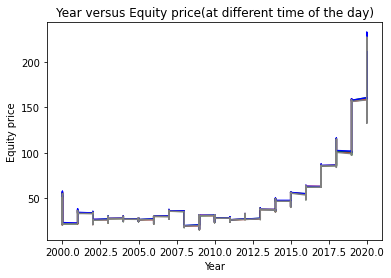

In [136]:
plt.title("Year versus Equity price(at different time of the day)")
plt.xlabel("Year")
plt.ylabel("Equity price")
plt.plot(year,open,'red',year,close,'green',year,high,'blue',year,low,'gray')
plt.show()

<h2><b><u>Assertion</u></b></h2>
<h4>This plot is is to show that there no signficant difference between opening, closing, high or low prices on average as their correlation is very high. This is the reason I can choose any one of these as my target variable and the model trained on that will perform well on other prices as well.</h4>

In [137]:
# data aggregation
X=[]
Y=[]
for i in range(open.shape[0]):
  temp=[]
  temp.append(year[i])
  temp.append(month[i])
  temp.append(day[i])
  X.append(temp)
  Y.append(open[i])
X=np.array(X)
Y=np.array(Y)

In [138]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,shuffle=False)

In [139]:
# support vector machine regressor.
svm_regr=SVR(C=0.25)

In [140]:
svm_regr.fit(X_train,Y_train)

SVR(C=0.25, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [141]:
prediction=svm_regr.predict(X_test)

In [142]:
print("R^2 score of SVM regressor is  : "+str(svm_regr.score(X_test,Y_test)))

R^2 score of SVM regressor is  : -1.8149731418297748


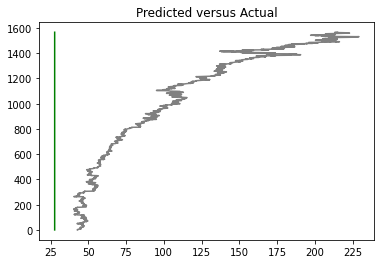

In [143]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

SVM regressor is not able to generalize on the data and performs poorly.

In [144]:
# Polynomial regression.
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
regr_poly=LinearRegression()
regr_poly.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
print("R^2 score of Polynomial regression is  : "+str(regr_poly.score(X_test_poly,Y_test)))

R^2 score of Polynomial regression is  : -0.5311375590743648


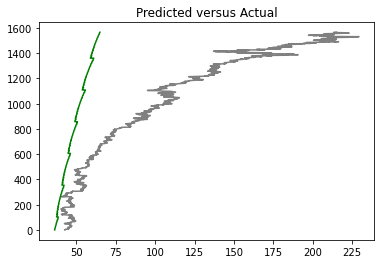

In [146]:
prediction=regr_poly.predict(X_test_poly)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

Changing degree of the fitting polynomial in the model does not affect R^2 score significantly as it affects the computation time that is why I am using degree=2 which is performing poorly but not that worse as compared to others.

In [147]:
# multi layer perceptron.
regr=MLPRegressor(hidden_layer_sizes=(8,16,8),learning_rate='adaptive',learning_rate_init=0.0001)
regr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 16, 8), learning_rate='adaptive',
             learning_rate_init=0.0001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [148]:
print("R^2 score of MLP(Multi Layered Perceptron) Regressor is  : "+str(regr.score(X_test,Y_test)))

R^2 score of MLP(Multi Layered Perceptron) Regressor is  : -1.7508633226148018


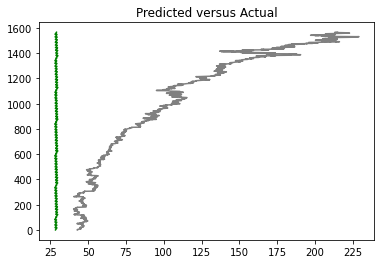

In [149]:
prediction=regr.predict(X_test)
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(Y_test,dummy,'gray',prediction,dummy,'green')
plt.show()

Performing extremely poorly as evident from highly negative R^2 score and the plot above.

In [150]:
# Convolutional Neural Network
n_steps=3
n_features=4
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
cnn_model.add(Dropout(0.25))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 2, 128)            1152      
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 128)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [151]:
seq_train,labs_train=sequencify(X_train,Y_train,n_steps)
seq_test,labs_test=sequencify(X_test,Y_test,n_steps)

In [152]:
labs_train=labs_train.reshape(labs_train.shape[0],1)
labs_test=labs_test.reshape(labs_test.shape[0],1)

In [153]:
history=cnn_model.fit(seq_train,labs_train,epochs=20,batch_size=4,validation_data=(seq_test,labs_test),shuffle=True)

Epoch 1/20
914/914 [==============================] - 1s 2ms/step - loss: 1448.8229 - mse: 1448.8229 - val_loss: 7350.9561 - val_mse: 7350.9561
Epoch 2/20
914/914 [==============================] - 1s 1ms/step - loss: 80.2842 - mse: 80.2842 - val_loss: 7202.4766 - val_mse: 7202.4766
Epoch 3/20
914/914 [==============================] - 1s 1ms/step - loss: 67.5494 - mse: 67.5494 - val_loss: 6783.6670 - val_mse: 6783.6670
Epoch 4/20
914/914 [==============================] - 1s 2ms/step - loss: 64.2042 - mse: 64.2042 - val_loss: 6969.1050 - val_mse: 6969.1050
Epoch 5/20
914/914 [==============================] - 1s 1ms/step - loss: 60.6583 - mse: 60.6583 - val_loss: 7054.0327 - val_mse: 7054.0327
Epoch 6/20
914/914 [==============================] - 1s 1ms/step - loss: 57.6790 - mse: 57.6790 - val_loss: 7016.6382 - val_mse: 7016.6382
Epoch 7/20
914/914 [==============================] - 1s 1ms/step - loss: 56.7280 - mse: 56.7280 - val_loss: 6837.1074 - val_mse: 6837.1074
Epoch 8/20
914/9

In [154]:
prediction=cnn_model.predict(seq_test)

In [155]:
debug_prediction(100)

EXAMPLE : 
for input sequence : [[2014.         12.         29.         47.700001]
 [2014.         12.         30.         47.439999]
 [2014.         12.         31.         46.73    ]]
 the actual value is : [46.66]
 the predicted value is : [39.181164]


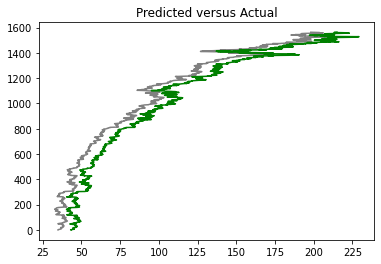

In [156]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

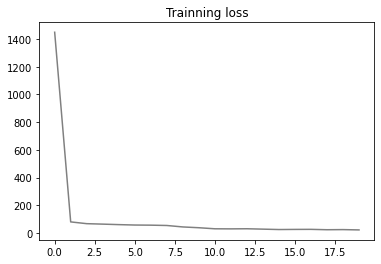

In [157]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

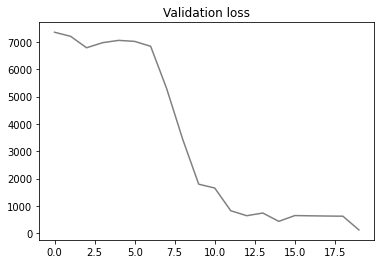

In [158]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')
plt.show()

Model is performing well on the data eventhough there is very high fluctuations.

In [159]:
# Long Short Term Memory Network
lstm_model = Sequential()
lstm_model.add(LSTM(50,activation='relu',input_shape=(n_steps,n_features),return_sequences=True))
lstm_model.add(Dropout(0.25))
lstm_model.add(Bidirectional(LSTM(50,activation='relu')))
lstm_model.add(Flatten())
lstm_model.add(Dense(100,activation='relu'))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse',metrics=['mse'])
lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 50)             11000     
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100)               40400     
_________________________________________________________________
flatten_7 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [160]:
history=lstm_model.fit(seq_train,labs_train,epochs=40,batch_size=16,validation_data=(seq_test,labs_test),shuffle=True)

Epoch 1/40
229/229 [==============================] - 2s 7ms/step - loss: 169.7039 - mse: 169.7039 - val_loss: 7523.5493 - val_mse: 7523.5493
Epoch 2/40
229/229 [==============================] - 1s 6ms/step - loss: 55.4128 - mse: 55.4128 - val_loss: 7571.8716 - val_mse: 7571.8716
Epoch 3/40
229/229 [==============================] - 1s 5ms/step - loss: 45.2261 - mse: 45.2261 - val_loss: 7051.5933 - val_mse: 7051.5933
Epoch 4/40
229/229 [==============================] - 1s 5ms/step - loss: 43.0730 - mse: 43.0730 - val_loss: 7043.4941 - val_mse: 7043.4941
Epoch 5/40
229/229 [==============================] - 1s 6ms/step - loss: 37.9492 - mse: 37.9492 - val_loss: 6635.3828 - val_mse: 6635.3828
Epoch 6/40
229/229 [==============================] - 1s 5ms/step - loss: 35.0260 - mse: 35.0260 - val_loss: 6392.8013 - val_mse: 6392.8013
Epoch 7/40
229/229 [==============================] - 1s 6ms/step - loss: 30.3097 - mse: 30.3097 - val_loss: 4932.0415 - val_mse: 4932.0415
Epoch 8/40
229/229

In [161]:
prediction=lstm_model.predict(seq_test)

In [162]:
debug_prediction(100)

EXAMPLE : 
for input sequence : [[2014.         12.         29.         47.700001]
 [2014.         12.         30.         47.439999]
 [2014.         12.         31.         46.73    ]]
 the actual value is : [46.66]
 the predicted value is : [35.334248]


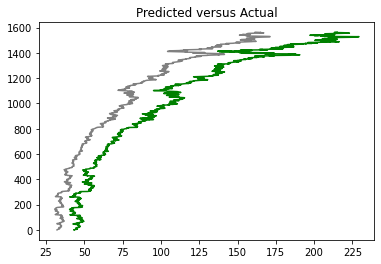

In [163]:
dummy=np.array([i for i in range(len(prediction))])
plt.title("Predicted versus Actual")
plt.plot(prediction,dummy,'gray',labs_test,dummy,'green')
plt.show()

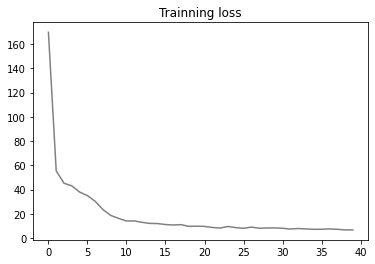

In [164]:
loss=history.history['loss']
val_loss=history.history['val_loss']
dummy=[i for i in range(len(loss))]
plt.title("Trainning loss")
plt.plot(dummy,loss,'gray')
plt.show()

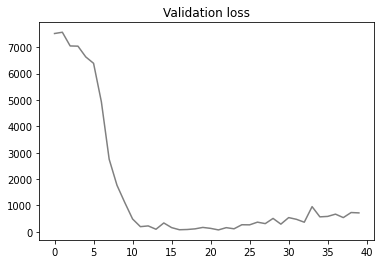

In [165]:
plt.title("Validation loss")
plt.plot(dummy,val_loss,'gray')
plt.show()

LSTM was able to generalize well but due to selected hyperparameter, it got gets stuck at local minimas. To tackle this situation I can use an automated script to explote the parameter space and find optimal set of them.

This marks end of my analysis.<br>
<h2><b><u>Conclusion</u></b></h2>
I analyzed several policies/changes adopted in international firms and through  exploratory data analysis concluded the overall performance of the equities in the capital market and then explored several machine learning models to find best suited ones for the provided data.
The best suited models for the stock price modelling is CNN and LSTM and sometimes Polyomial regression performed beyond my expectations.<br>

This study will be used in the project backend which will figure out best suited model for the data provided to the proposed system whch then will perform all the analysis in automated fashion and project the results in form of visuals in the dashboard with forecast of future performance for the user to extrapolate the viability of the policy in long run. <br>

Followung are future works that need to be done  : 
<ul>
<li>The code in this analysis are redundant and can be cleaned and optimized</li>
<li>Front end interface need to be made so as to leverage user with easy to use platform for their one stop solution for algorithmic trading.</li>
<li>Automated script need to be developed for hyperparameter tuning to make model more viable.</li>
<li>Demonetization is a hot topic till today in India which affected firms working not only in the country but also the ones who have any kind of alliance in India. I want to test my proposed solution on this scenario as well.</li>
</ul>
<br><b>Note : </b> All the analysis performed here will be present in the platform as baseline against which any user can test their firm's growth.<br>


<h2><b><u>Resources</u></b></h2>
<ul>
<li>Data has been collected using <a href="https://in.finance.yahoo.com/">Yahoo Finance</a>.</li>
<li>For tensorflow related features I referenced <a href="https://www.tensorflow.org/api_docs/python">Tensorflow Documentation</a>.</li>
<li>For capital market and investment banking concepts used <a href="https://www.investopedia.com/terms/i/investment-banking.asp">Investopedia</a> articles.</li>
<li>Concept of time series forecasting using CNN has been developed upon <a href="https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/">Machine Learning Mastery</a> article.</li>
<li>For polynomial regression referenced <a href="https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/">Geeks for Geeks</a> article o polynomial regression using Sci-Kit learn.</li>
<li>Referenced <a href="https://scikit-learn.org/">Scikit Learn</a> Documentation for traditional machine learning models.</li>
<li>Video lectures of <a href="https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A">Siraj Raval</a> proved to be good strating point for me.</li>
</ul>